In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import os
from PIL import Image
import random
from skimage.transform import resize

In [2]:
data_dir = 'C:\\Users\\Akshay\\Downloads\\Machine Learning Competition\\Analytics Vidhya'

In [3]:
test_path = data_dir+'\\Test\\'
train_path = data_dir+'\\Train\\'

In [4]:
train = pd.read_csv(os.path.join(train_path, 'train.csv'))
test = pd.read_csv(os.path.join(test_path, 'test.csv'))

In [5]:
os.listdir(train_path)[0]

'0.jpg'

MIDDLE


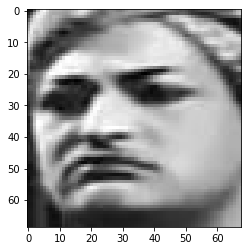

In [6]:
train_image = train_path+'0.jpg'
plt.imshow(plt.imread(train_image))
print(train.Class[0])

YOUNG


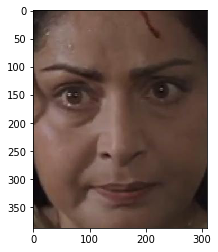

In [7]:
train_image = train_path+'1.jpg'
plt.imshow(plt.imread(train_image))
print(train.Class[1])

MIDDLE


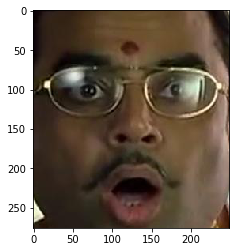

In [8]:
train_image = train_path+'3.jpg'
plt.imshow(plt.imread(train_image))
print(train.Class[2])

In [9]:
l1 = []
i = random.choice(train.index)
img_name = train.ID[i]
for i in train.ID:
    img_path = os.path.join(data_dir, 'Train', i)
    img = plt.imread(img_path)
    img = resize(img, (48, 48))
    img = img.astype('float32')
    l1.append(img)
train_x = np.stack(l1)

In [10]:
l1 = []
i = random.choice(test.index)
img_name = test.ID[i]
for i in test.ID:
    img_path = os.path.join(data_dir, 'Test', i)
    img = plt.imread(img_path)
    img = resize(img, (48, 48))
    img = img.astype('float32')
    l1.append(img)
test_x = np.stack(l1)

In [11]:
train_x = train_x/255
test_x = test_x/255

In [12]:
from sklearn.preprocessing import LabelEncoder
le = LabelEncoder()

In [13]:
import keras
train_y = le.fit_transform(train.Class)
train_y = keras.utils.np_utils.to_categorical(train_y)

Using TensorFlow backend.


In [14]:
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Activation, Dropout, Flatten, Dense, Conv2D, MaxPooling2D

In [15]:
image_shape = (48, 48, 3)
batch_size = 128

In [16]:
model = Sequential()

model.add(Conv2D(filters = 128, kernel_size = (5, 5), input_shape = image_shape, activation = 'relu'))
model.add(MaxPooling2D(pool_size = (2,2)))
model.add(Dropout(0.5))

model.add(Conv2D(filters = 128, kernel_size = (3, 3), input_shape = image_shape, activation = 'relu'))
model.add(MaxPooling2D(pool_size = (2,2)))
model.add(Dropout(0.5))

model.add(Flatten())

model.add(Dense(256))
model.add(Activation('relu'))

model.add(Dense(128))
model.add(Activation('relu'))

model.add(Dense(3))
model.add(Activation('softmax'))

model.compile(loss= 'categorical_crossentropy', optimizer = 'adam', metrics = ['accuracy'])
model.summary()

Model: "sequential"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv2d (Conv2D)              (None, 44, 44, 128)       9728      
_________________________________________________________________
max_pooling2d (MaxPooling2D) (None, 22, 22, 128)       0         
_________________________________________________________________
dropout (Dropout)            (None, 22, 22, 128)       0         
_________________________________________________________________
conv2d_1 (Conv2D)            (None, 20, 20, 128)       147584    
_________________________________________________________________
max_pooling2d_1 (MaxPooling2 (None, 10, 10, 128)       0         
_________________________________________________________________
dropout_1 (Dropout)          (None, 10, 10, 128)       0         
_________________________________________________________________
flatten (Flatten)            (None, 12800)             0

In [17]:
from tensorflow.keras.callbacks import EarlyStopping
early_stop = EarlyStopping(monitor = 'val_loss', patience = 2)

In [18]:
results = model.fit(train_x, train_y, batch_size= batch_size, epochs= 50)

Train on 19906 samples
Epoch 1/50
19906/19906 [==============================] - 492s 25ms/sample - loss: 0.9635 - accuracy: 0.5337
Epoch 2/50
19906/19906 [==============================] - 494s 25ms/sample - loss: 0.9411 - accuracy: 0.5460
Epoch 3/50
19906/19906 [==============================] - 492s 25ms/sample - loss: 0.8735 - accuracy: 0.5870
Epoch 4/50
19906/19906 [==============================] - 494s 25ms/sample - loss: 0.8345 - accuracy: 0.6154
Epoch 5/50
19906/19906 [==============================] - 491s 25ms/sample - loss: 0.8156 - accuracy: 0.6243
Epoch 6/50
19906/19906 [==============================] - 410s 21ms/sample - loss: 0.8012 - accuracy: 0.6348
Epoch 7/50
19906/19906 [==============================] - 299s 15ms/sample - loss: 0.7884 - accuracy: 0.6445
Epoch 8/50
19906/19906 [==============================] - 300s 15ms/sample - loss: 0.7771 - accuracy: 0.6475
Epoch 9/50
19906/19906 [==============================] - 299s 15ms/sample - loss: 0.7640 - accuracy: 0.6

In [19]:
pred = model.predict_classes(test_x)

In [20]:
pred = le.inverse_transform(pred)

In [21]:
test['Class'] = pred

In [22]:
test.to_csv('Sub7.csv', index= False)